![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Introduction

In today's fast-paced world, it's essential to stay updated with the latest news and information. However, going through multiple news articles can be time-consuming. To help you save time and get a quick overview of the important points, let’s develop a News Articles Summarizer application using ChatGPT and LangChain. With this powerful tool, we can scrape online articles, extract their titles and text, and generate concise summaries. Within this lesson, we will walk you through the workflow of constructing a summarizer. We will employ the concepts we discussed in earlier lessons, demonstrating their application in a real-world scenario.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. Installing Dependencies

In [1]:
!pip3 install langchain==0.0.208 openai==0.27.8 python-dotenv requests newspaper3k

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 59.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=4536c55678d09a1de2c1

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 3. Mount Google Drive & Load API Keys

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


All the API Keys are stored in file "llm_env". It's contents are as below:

ACTIVELOOP_TOKEN=<[Your Activeloop API Key](https://app.activeloop.ai/register)>

OPENAI_API_KEY=<[Your OpenAI API Key](https://platform.openai.com/)>

GOOGLE_API_KEY=<[Your Google API Key](https://console.cloud.google.com/apis/credentials)>

GOOGLE_CSE_ID=<[Your Google Custom Search Engine ID](https://programmablesearchengine.google.com/controlpanel/create)>

HUGGINGFACEHUB_API_TOKEN=<[Your Hugging Face Access Token](https://huggingface.co/settings/tokens)>

In [3]:
from dotenv import load_dotenv

# Load API Keys for Deep Lake Vector Database, OpenAI, Google & Hugging Face
load_dotenv('/content/drive/MyDrive/ancilcleetus-github/llm_env')

True

In [ ]:
import os

print(f"os.environ['ACTIVELOOP_TOKEN']: \n{os.environ['ACTIVELOOP_TOKEN']}")
print(f"os.environ['OPENAI_API_KEY']: \n{os.environ['OPENAI_API_KEY']}")
print(f"os.environ['GOOGLE_API_KEY']: \n{os.environ['GOOGLE_API_KEY']}")
print(f"os.environ['GOOGLE_CSE_ID']: \n{os.environ['GOOGLE_CSE_ID']}")
print(f"os.environ['HUGGINGFACEHUB_API_TOKEN']: \n{os.environ['HUGGINGFACEHUB_API_TOKEN']}")

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 4. Workflow for Building a News Articles Summarizer

Here’s what we are going to do in this project.

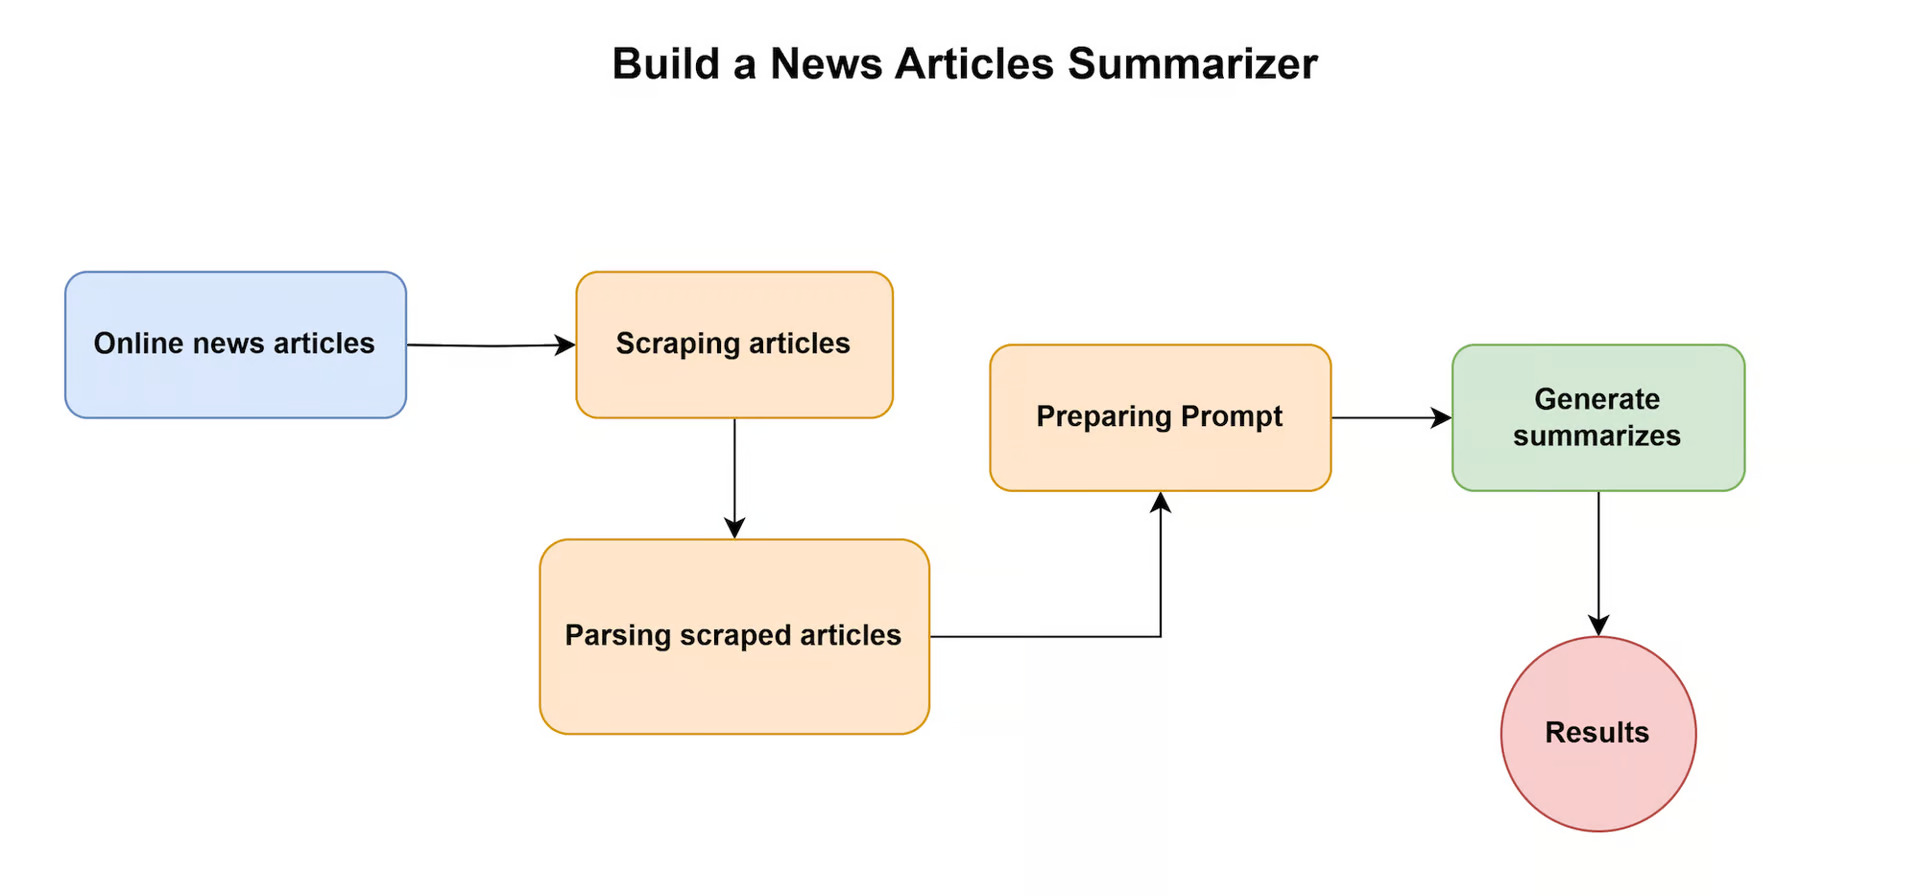

In [ ]:
# Workflow for News Articles Summarizer

from IPython import display
display.Image("data/images/GenAI-02-News-Articles-Summarizer-Workflow.jpg")

Here are the steps described in more detail:

- **Install required libraries:** To get started, ensure you have the necessary libraries installed: `requests`, `newspaper3k` and `langchain`.

- **Scrape articles:** Use the `requests` library to scrape the content of the target news articles from their respective URLs.

- **Extract titles and text:** Employ the `newspaper3k` library to parse the scraped HTML and extract the titles and text of the articles.

- **Preprocess the text:** Clean and preprocess the extracted texts to make them suitable for input to ChatGPT.

- **Generate summaries:** Utilize ChatGPT to summarize the extracted articles' text concisely.

- **Output the results:** Present the summaries along with the original titles, allowing users to grasp the main points of each article quickly.

By following this workflow, you can create an efficient News Articles Summarizer that leverages ChatGPT to provide valuable insights in a time-saving manner. Stay informed without spending hours reading through lengthy articles, and enjoy the benefits of AI-powered summarization.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 5. Building the News Articles Summarizer

## 1. Get the Article from URL

We picked the URL of a news article to generate a summary. The following code fetches articles from a list of URLs using the `requests` library with a custom User-Agent header. It then extracts the title and text of each article using the `newspaper` library.

In [5]:
import requests
from newspaper import Article

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'
}

article_url = "https://www.artificialintelligence-news.com/2022/01/25/meta-claims-new-ai-supercomputer-will-set-records/"

session = requests.Session()

try:
    response = session.get(article_url, headers=headers, timeout=10)

    if response.status_code == 200:
        article = Article(article_url)
        article.download()
        article.parse()

        print(f"Title: {article.title}")
        print(f"Text: {article.text}")

    else:
        print(f"Failed to fetch article at {article_url}")
except Exception as e:
    print(f"Error occurred while fetching article at {article_url}: {e}")

Title: Meta claims its new AI supercomputer will set records
Text: Ryan Daws is a senior editor at TechForge Media with over a decade of experience in crafting compelling narratives and making complex topics accessible. His articles and interviews with industry leaders have earned him recognition as a key influencer by organisations like Onalytica. Under his leadership, publications have been praised by analyst firms such as Forrester for their excellence and performance. Connect with him on X (@gadget_ry) or Mastodon (@gadgetry@techhub.social)

Meta (formerly Facebook) has unveiled an AI supercomputer that it claims will be the world’s fastest.

The supercomputer is called the AI Research SuperCluster (RSC) and is yet to be fully complete. However, Meta’s researchers have already begun using it for training large natural language processing (NLP) and computer vision models.

RSC is set to be fully built in mid-2022. Meta says that it will be the fastest in the world once complete and 

## 2. Summarize the Article

In [6]:
from langchain.schema import (
    HumanMessage
)

# We get the article data from the scraping part
article_title = article.title
article_text = article.text

# Prepare template for prompt
template = """You are a very good assistant that summarizes online articles.

Here's the article you want to summarize.

==================
Title: {article_title}

{article_text}
==================

Write a summary of the previous article.
"""

# Format prompt
prompt = template.format(article_title=article.title, article_text=article.text)

messages = [HumanMessage(content=prompt)]

In [7]:
from langchain.chat_models import ChatOpenAI

# Load the model
chat = ChatOpenAI(model_name="gpt-4", temperature=0)

# Generate summary
summary = chat(messages)
print(summary.content)

Meta, formerly known as Facebook, has announced the development of an AI supercomputer, the AI Research SuperCluster (RSC), which it claims will be the world's fastest upon completion in mid-2022. The RSC is already being used by Meta's researchers for training large natural language processing and computer vision models. The supercomputer is expected to be 20 times faster than Meta's current V100-based clusters and will be capable of training models with trillions of parameters. The RSC is designed with security and privacy controls, allowing Meta to use real-world examples from its production systems in training. The company hopes that the RSC will help in building new AI systems for real-time voice translations and other applications in the metaverse.


## 3. Summarize the Article in Bulleted List

If we want a bulleted list, we can modify the prompt and get the result.

In [8]:
# Prepare template for prompt
template = """You are an advanced AI assistant that summarizes online articles into bulleted lists.

Here's the article you need to summarize.

==================
Title: {article_title}

{article_text}
==================

Now, provide a summarized version of the article in a bulleted list format.
"""

# Format prompt
prompt = template.format(article_title=article.title, article_text=article.text)

messages = [HumanMessage(content=prompt)]

# Generate summary
summary = chat(messages)
print(summary.content)

- Meta (formerly Facebook) has announced the development of an AI supercomputer, the AI Research SuperCluster (RSC), which it claims will be the world's fastest.
- The RSC is not yet fully built, but researchers have already started using it for training large natural language processing (NLP) and computer vision models.
- The supercomputer is expected to be fully operational by mid-2022 and is aimed at training models with trillions of parameters.
- Meta hopes that the RSC will help build new AI systems that can power real-time voice translations for large groups of people speaking different languages.
- The work done with RSC is intended to contribute to the development of technologies for the next major computing platform, the metaverse.
- Meta expects the RSC to be 20 times faster than its current V100-based clusters, 9 times faster at running the NVIDIA Collective Communication Library (NCCL), and 3 times faster at training large-scale NLP workflows.
- A model with tens of billion

## 4. Summarize the Article in Bulleted List in French

If you want to get the summary in French, you can instruct the model to generate the summary in French language. However, please note that GPT-4's main training language is English and while it has a multilingual capability, the quality may vary for languages other than English. Here's how you can modify the prompt:

In [10]:
# Prepare template for prompt
template = """You are an advanced AI assistant that summarizes online articles into bulleted lists in French.

Here's the article you need to summarize.

==================
Title: {article_title}

{article_text}
==================

Now, provide a summarized version of the article in a bulleted list format, in French.
"""

# Format prompt
prompt = template.format(article_title=article.title, article_text=article.text)

messages = [HumanMessage(content=prompt)]

# Generate summary
summary = chat(messages)
print(summary.content)

- Meta (anciennement Facebook) a dévoilé un superordinateur d'IA qu'il prétend être le plus rapide du monde.
- Le superordinateur est appelé AI Research SuperCluster (RSC) et n'est pas encore entièrement terminé.
- Les chercheurs de Meta ont déjà commencé à l'utiliser pour former de grands modèles de traitement du langage naturel (NLP) et de vision par ordinateur.
- RSC devrait être entièrement construit à la mi-2022. Meta affirme qu'il sera le plus rapide du monde une fois terminé.
- L'objectif est qu'il soit capable de former des modèles avec des trillions de paramètres.
- Meta espère que RSC aidera à construire de nouveaux systèmes d'IA qui pourront, par exemple, permettre des traductions vocales en temps réel à de grands groupes de personnes parlant différentes langues.
- Pour la production, Meta s'attend à ce que RSC soit 20 fois plus rapide que les clusters actuels basés sur V100 de Meta.
- RSC est également estimé être 9 fois plus rapide pour exécuter la bibliothèque de communic

The process under the hood of this code is quite fascinating. First, we obtain the article data, including the title and text. We then prepare a template for the prompt we want to give to the AI model. This prompt is designed to simulate a conversation with the model, telling it that it's an "advanced AI assistant" and giving it a specific task - to summarize the article into a bulleted list in French.

Once the template is ready, we load the GPT-4 model using `ChatOpenAI` class with a certain temperature setting, which influences the randomness of the model's outputs. We then format the prompt using the article data.

The core part of the process is when we pass the formatted prompt to the model. The model parses the prompt, understands the task, and generates a summary accordingly. It uses its vast knowledge, trained on diverse internet text, to comprehend and summarize the article in French.

Lastly, the generated summary, which is a response from the model, is printed. The summary is expected to be a concise, bullet-point version of the article in French, just as we instructed the model in the prompt.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)